In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
import pymc3 as pm

## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [16]:
## 1 point

## ToDo: read the csv file into a dataframe and show the first 5 rows

diab_df=pd.read_csv('diabetes.csv')
print(diab_df.shape)
diab_df.head()


(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
## 3 points

## Assign the Outcome variable to y and the rest to X.
## USe LogisticRegression to fit the data and print out the intercept and the coefficients

y = diab_df['Outcome']
X = diab_df.loc[:,diab_df.columns !='Outcome']

LogReg = LogisticRegression(random_state = 0, max_iter=1000).fit(X, y)
print("Intercept: %f" % ( LogReg.intercept_))
print("Coefficients: " + str(LogReg.coef_))

Intercept: -8.364487
Coefficients: [[ 1.22504795e-01  3.51112854e-02 -1.32989843e-02  7.79015138e-04
  -1.17339258e-03  8.96471193e-02  8.67318608e-01  1.49732914e-02]]


In [18]:
## 2 points

## Explain what the code is doing:
## What are the prior probabilities of the intercept and coefficients?
# Which likelihood distribution has been used?
## What does pm.invlogit(linreg) mean?
## What is map_est?

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sd=100)
    w1 = pm.Normal('w1', mu=0, sd=100)
    w2 = pm.Normal('w2', mu=0, sd=100)
    w3 = pm.Normal('w3', mu=0, sd=100)
    w4 = pm.Normal('w4', mu=0, sd=100)
    w5 = pm.Normal('w5', mu=0, sd=100)
    w6 = pm.Normal('w6', mu=0, sd=100)
    w7 = pm.Normal('w7', mu=0, sd=100)
    w8 = pm.Normal('w8', mu=0, sd=100)
   
    
    linreg = w0 * np.ones(diab_df.shape[0]) + w1 * diab_df.Pregnancies.values + w2 * diab_df.Glucose.values \
    + w3 * diab_df.BloodPressure.values + w4 * diab_df.SkinThickness.values + w5 * diab_df.Insulin.values + \
    w6 * diab_df.BMI.values + w7 * diab_df.DiabetesPedigreeFunction.values + w8 * diab_df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=diab_df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)


{'w0': array(-8.40381811), 'w1': array(0.12319259), 'w2': array(0.03516101), 'w3': array(-0.01329351), 'w4': array(0.00062072), 'w5': array(-0.00119151), 'w6': array(0.08968112), 'w7': array(0.94539065), 'w8': array(0.0148632)}


1. Explain what the code is doing     
It generated 9 Normal random variables with mean 0 and standard deviation of 100. Then it uses these random variables to get the linear regression equation. Then it calculates the likelihood by using Bernoulli. This likelihood is calculated by using the expected value of the linear regression equation that is calculated by using Sigmoid Function



2. What are the prior probabilities of the intercept and coefficients?
Prior probabilities are generated from the Normal distribution with a mean of 0 and standard deviation of 100. the resulting w0 is for the intercept and w1 to w8 are assigned to coefficients.


3. Which likelihood distribution has been used?
Bernoulli distribution.


4. What does pm.invlogit(linreg) mean?
pm.invlogit(linreg)- is utilizing the linear equation i.e. linreg to calculate the expected value by using the sigmoid function and we are storing the expected value in p_outcome. 


5. What is map_est?
pm.find_MAP calculates the posterior coffecient for each variables w0 through w8. map_est stores the modes of the posterior for each of the variables w0 to w8.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  """
Only 400 samples in chain.
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [w8]
>Metropolis: [w7]
>Metropolis: [w6]
>Metropolis: [w5]
>Metropolis: [w4]
>Metropolis: [w3]
>Metropolis: [w2]
>Metropolis: [w1]
>Metropolis: [w0]


Sampling 2 chains for 1_000 tune and 400 draw iterations (2_000 + 800 draws total) took 20 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results.

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w0,-5.938,2.718,-9.357,-2.947,1.895,1.596,3.0,13.0,2.24
w1,0.115,0.028,0.067,0.164,0.009,0.007,12.0,63.0,1.12
w2,0.018,0.016,0.002,0.037,0.011,0.010,2.0,2.0,2.75
w3,-0.010,0.010,-0.026,0.000,0.007,0.006,2.0,33.0,3.40
w4,0.005,0.008,-0.007,0.014,0.005,0.004,3.0,68.0,2.37
w5,0.000,0.001,-0.002,0.001,0.001,0.001,3.0,35.0,1.90
w6,0.057,0.049,0.004,0.113,0.034,0.029,3.0,3.0,2.12
w7,1.029,0.254,0.572,1.541,0.043,0.031,33.0,106.0,1.08
w8,0.023,0.008,0.010,0.037,0.003,0.002,9.0,12.0,1.39


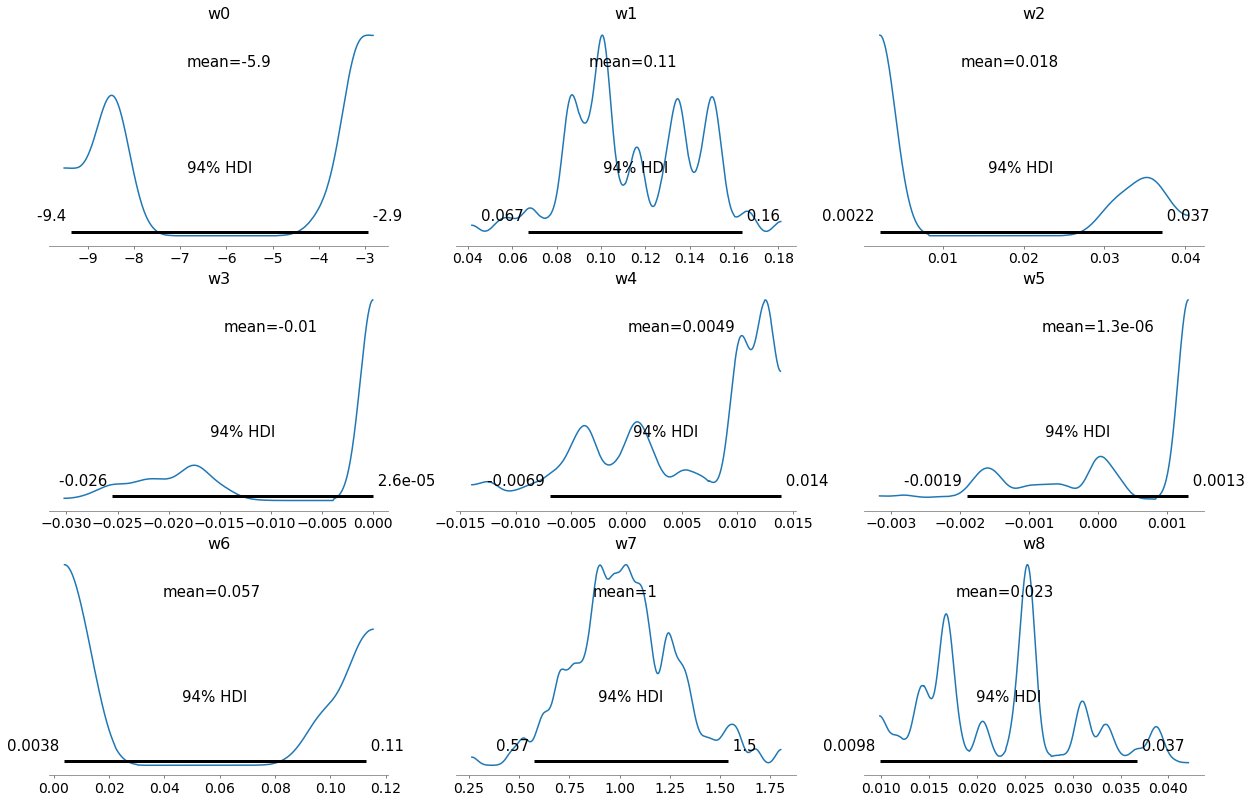

In [26]:
## 2 points

with logreg_model:
## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace
  trace = pm.sample(400, step=pm.Metropolis(),random_seed=46)
## Explain the output of the plot 
az.plot_posterior(trace)
display(az.summary(trace))

The above graphs can be used to analyse the posterior distribution. As it can be seen that most of the graphs do not have normal shaped curve which is the prior distribution of this model. Here R-hat values are also higher than 1.1 indicating inadequate convergence of the sample. This model is not converging and adding more samples could help to converge.